In [2]:
# Import some modules
import os, sys, pickle, pandas as pd, numpy as np, matplotlib.pyplot as plt, pylab as pl
sys.path.insert(0,os.path.join('..','Codes','lib'))          # add a directory to search functions
import functions
from matplotlib.ticker import MaxNLocator, FormatStrFormatter
from matplotlib.colors import LogNorm
import matplotlib.patheffects as path_effects
from keras.utils import plot_model
from keras.models import load_model
from scipy import stats
plt.style.use('ggplot')

%matplotlib inline

path_gen_data = "../Codes/gen_data/"
path_graphs = "./graphs/"

In [29]:
# Some text to print in graphs in spanish and english
dict_epoch = {'spa':"Época", 'eng':"Epoch"}
dict_acc = {'spa':"Precisión", 'eng':"Accuracy"}
dict_last_acc = {'spa':"Precisión obtenida (val)", 'eng':"Accuracy achieved (val)"}
dict_train = {'spa':"Entrenamiento", 'eng':"Train"}
dict_val = {'spa':"Validación", 'eng':"Validation"}
dict_real_class = {'spa':"Clase natural", 'eng':"Natural class"}
dict_pred_class = {'spa':"Clase predicha", 'eng':"Predicted class"}
dict_adv_class = {'spa':"Clase adversa", 'eng':"Adversarial class"}
dict_mnist_class_names = {'spa':['0','1','2','3','4','5','6','7','8','9'], 'eng':['0','1','2','3','4','5','6','7','8','9']}
dict_cifar10_class_names = {'spa':['avión','automovil','pájaro','gato','ciervo','perro','rana','caballo','barco','camión'], 'eng':['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']}
dict_diabret_class_names = {'spa':['ojo sano sin RD','RD leve','RD moderada','RD severa','RD proliferativa'], 'eng':['No DR', 'Mild DR','Moderate DR','Severe DR','Proliferative DR']}
dict_class_names = {'MNIST':dict_mnist_class_names,'CIFAR10':dict_cifar10_class_names, 'DR':dict_diabret_class_names, 'smallDR':dict_diabret_class_names}
dict_natural_img = {'spa':"Imagen natural", 'eng':"Natural"}
dict_adversarial_img = {'spa':"Imagen adversa", 'eng':"Adversarial"}
dict_abs_perturbation = {'spa':"abs(Perturbación)", 'eng':"abs(Perturbation)"}
dict_naturals = {'spa':"Naturales", 'eng':"Naturals"}
dict_adversarials = {'spa':"Adversas", 'eng':"Adversarials"}
dict_best_threshold = {'spa':r"Umbral óptimo $f_{T}$", 'eng':r"Optimal threshold $f_{T}$"}
dict_images_fraction = {'spa':"Fracción de imágenes",'eng':"Fraction of images"}
dict_tp = {'spa':"Verdaderos positivos", 'eng':"True positives"}
dict_fp = {'spa':"Falsos positivos", 'eng':"False positives"}
dict_sigma_dense = {'spa':r"$\sigma_{den}$",'eng':r"$\sigma_{dense}$"}
dict_sigma_conv = {'spa':r"$\sigma_{conv}$",'eng':r"$\sigma_{conv}$"}

# SINGLE STUDY

In this section you will find graphs corresponding to one database, with one model, one attack and one detection method 

In [50]:
# Choose settings to graph
dataset = "smallDR"
model = "2"

attack = "CW2"
eta = 30.0          # deepfool only
epsilon = 0.001      # FGSM only
kappa = 0.1        # CW2 only
cte_init = 0.017    # CW2 only
cte_update = cte_init   # CW2 only
max_iter = 50 if (dataset == "smallDR" and attack == "CW2")  else 20      # deepfool and CW2 only

detection = "stoGauNet"
x_start, x_end, dx_plot = 0.0, 9.0, 1.0
y_start, y_end, dy_plot = 0.0, 9.0, 1.0
noise_iter = 100 if dataset != "smallDR" else 20

lang = "spa"

# Do not modify the code below
if dataset == "MNIST" or dataset == "CIFAR10":
    n_succ = 2000 # 2000
else:
    n_succ = 200 # 200
attack_desc = attack
if attack == "deepfool":
    attack_desc += "_eta_" + functions.float_to_str(eta)
    attack_desc += "_mi_" + str(max_iter)
elif attack == "FGSM":
    attack_desc += "_eps_" + functions.float_to_str(epsilon)
elif attack == "CW2":
    attack_desc += "_kap_" + functions.float_to_str(kappa)
    attack_desc += "_cte_" + functions.float_to_str(cte_init)
    attack_desc += "_cteupd_" + functions.float_to_str(cte_update)
    attack_desc += "_mi_" + str(max_iter)
attack_desc += "_ns_" + str(n_succ)

detection_desc = detection
if detection == "stoGauNet":
    detection_desc += "_xs_" + functions.float_to_str(x_start)
    detection_desc += "_xe_" + functions.float_to_str(x_end)
    detection_desc += "_dx_" + functions.float_to_str(dx_plot)
    detection_desc += "_ys_" + functions.float_to_str(y_start)
    detection_desc += "_ye_" + functions.float_to_str(y_end)
    detection_desc += "_dy_" + functions.float_to_str(dy_plot)
    detection_desc += "_ni_" + str(noise_iter)

## MODEL, HISTORY AND CONFUSION MATRIX

### Model

In [51]:
path_model_load = path_gen_data + dataset + "-model_" + model + "-model.h5"
path_model_save = path_graphs + dataset + "-model_" + model + "-model.pdf"

print("---TRAIN PHASE---")
print("Dataset: "+dataset)
print("Model: "+model)
print("\n")

loaded_model = load_model(path_model_load)
plot_model(loaded_model, to_file = path_model_save, show_layer_names=False, expand_nested=False, show_shapes = True)
loaded_model.summary()

---TRAIN PHASE---
Dataset: smallDR
Model: 2


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 100, 150, 32)      896       
                                                                 
 activation_46 (Activation)  (None, 100, 150, 32)      0         
                                                                 
 batch_normalization_25 (Bat  (None, 100, 150, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 50, 75, 32)       0         
 g2D)                                                            
                                                         

### History

---TRAIN PHASE---
Dataset: smallDR
Model: 2
Best accuracy (val): 0.349
Last accuracy (val): 0.328




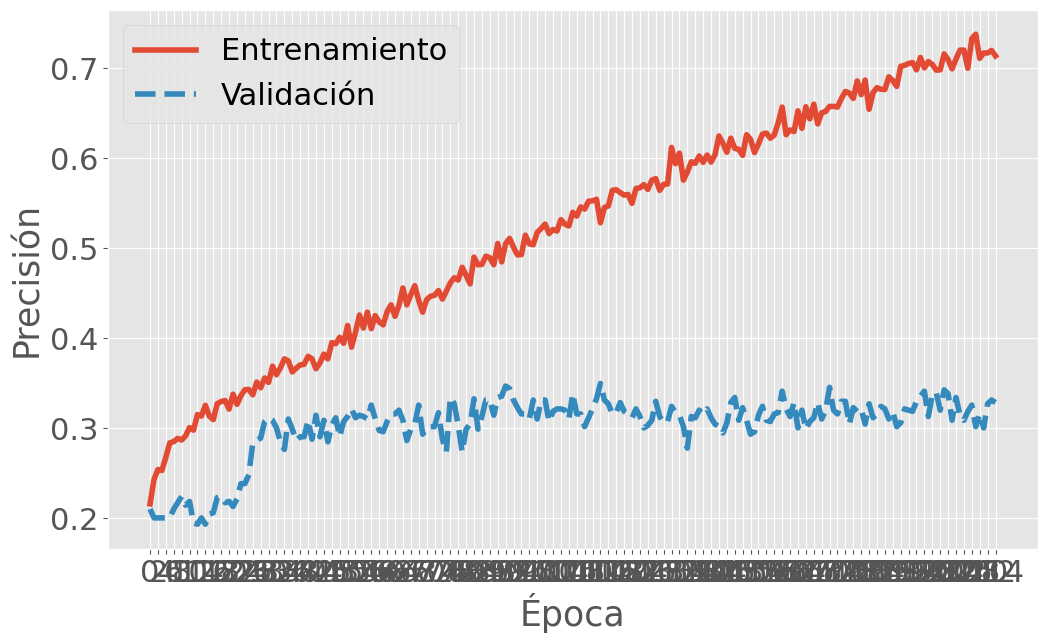

In [52]:
path_history_load = open(path_gen_data + dataset + "-model_" + model + "-history.pickle", "rb")
path_history_save = path_graphs + dataset + "-model_" + model + "-history.pdf"

history = pickle.load(path_history_load)
maxValAcc = np.round(max(history['val_acc']),3)
lastValAcc = np.round(history['val_acc'][len(history['val_acc'])-1],3)

print("---TRAIN PHASE---")
print("Dataset: "+dataset)
print("Model: "+model)
print("Best accuracy (val): " + str(maxValAcc))
print("Last accuracy (val): " + str(lastValAcc))
print("\n")

fig,ax = plt.subplots(1, figsize = (12, 7))
ax.plot(history['acc'], '-', linewidth = 4)
ax.plot(history['val_acc'], '--', linewidth = 4)
# ax.text(0.95, 0.5, dict_last_acc[lang] + ' = {:.3f}'.format(lastValAcc) , va="center", ha='right', fontsize = 21, transform=ax.transAxes)
ax.set_xlabel(dict_epoch[lang], fontsize = 25)
ax.set_ylabel(dict_acc[lang], fontsize = 25)
ax.tick_params(axis='both', labelsize=22)
ax.legend([dict_train[lang], dict_val[lang]], loc='best',fontsize = 22)
# x ticks every 5 epochs
x_ticks = np.arange(0, len(history['acc'])+1, 2)
ax.set_xticks(x_ticks)
plt.show()
fig.savefig(path_history_save, bbox_inches="tight", pad_inches=0)

### Confusion matrix

---TRAIN PHASE---
Dataset: smallDR
Model: 2
Last accuracy (val): 0.328




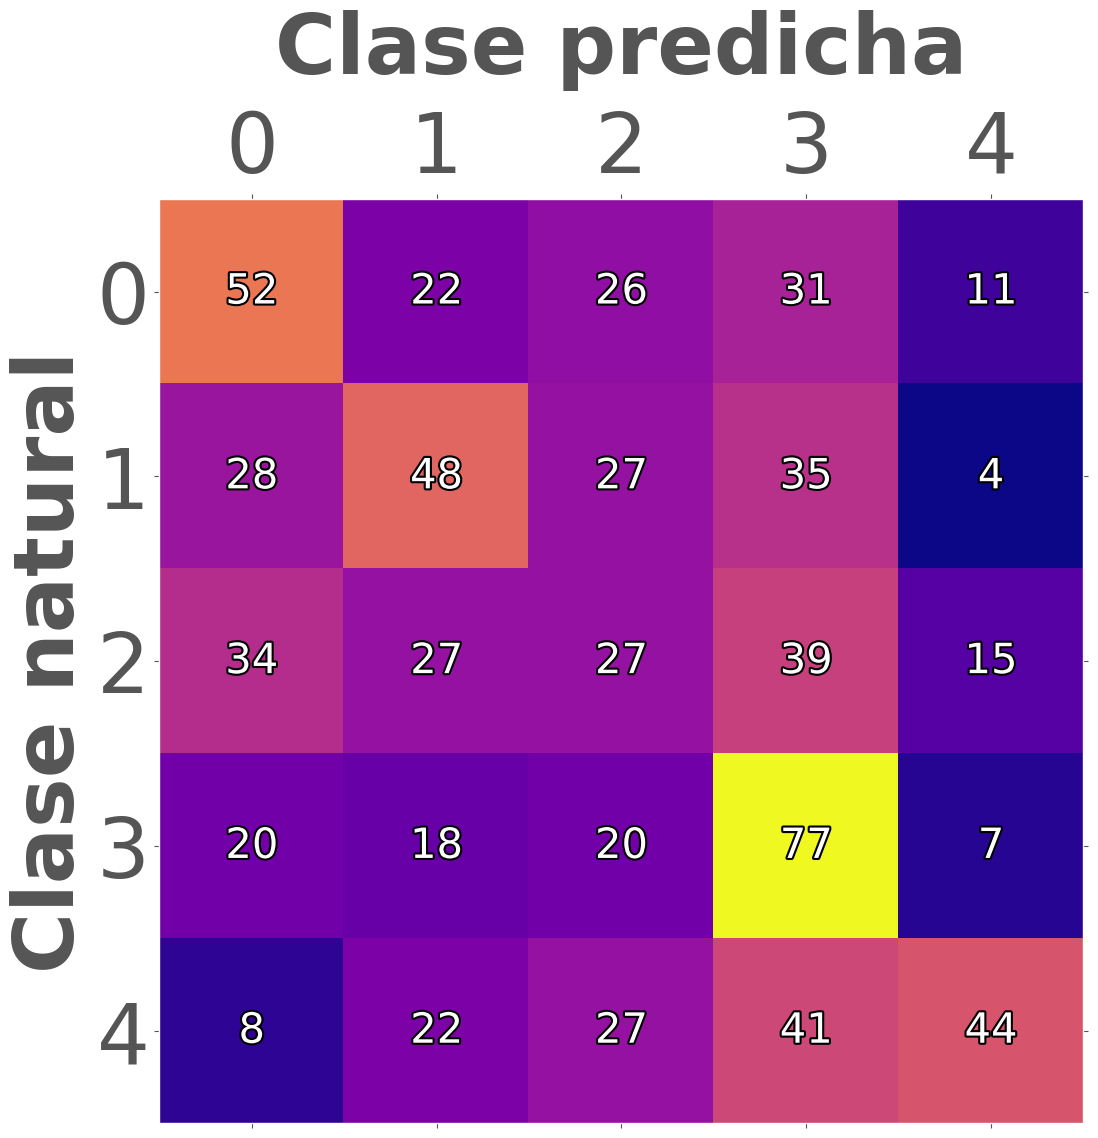

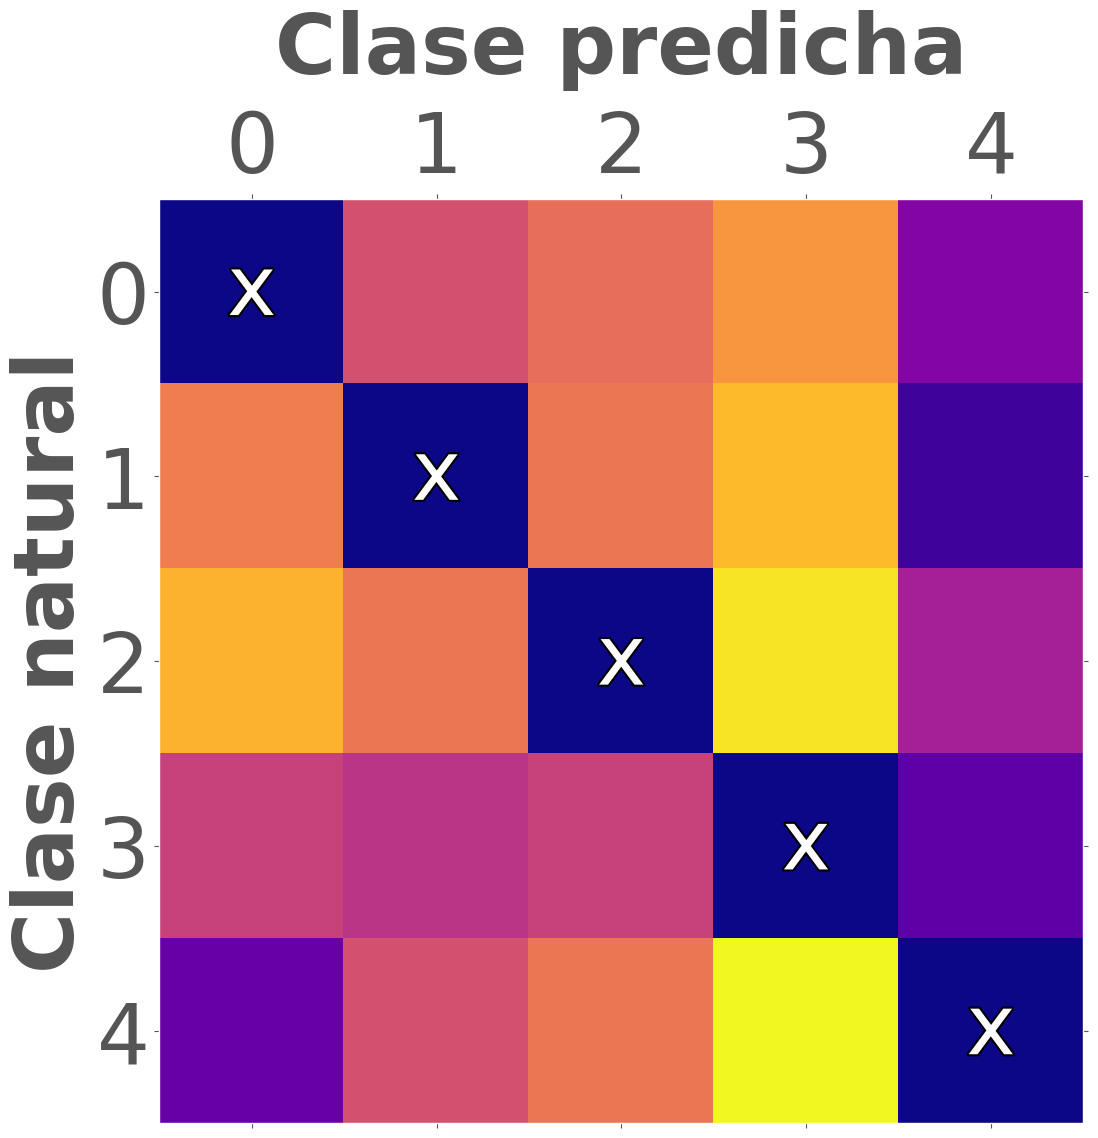

In [53]:
path_conf_mat_load = path_gen_data + dataset + "-model_" + model + "-conf_mat.npy"
path_conf_mat_save = path_graphs + dataset + "-model_" + model + "-conf_mat.pdf"
path_conf_mat_no_diag_save = path_graphs + dataset + "-model_" + model + "-conf_mat_no_diag.pdf"


print("---TRAIN PHASE---")
print("Dataset: "+dataset)
print("Model: "+model)
print("Last accuracy (val): " + str(lastValAcc))
print("\n")

conf_mat = np.load(path_conf_mat_load)
nb_classes = conf_mat.shape[0]

fig, ax = plt.subplots(figsize = (12,12))
ax.matshow(conf_mat, cmap = plt.cm.plasma)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_xticks(np.arange(nb_classes))
ax.set_yticks(np.arange(nb_classes))
ax.set_xlabel(dict_pred_class[lang], fontsize = 60, fontweight='bold', labelpad = 25)
ax.set_ylabel(dict_real_class[lang], fontsize = 60, fontweight='bold')
ax.tick_params(axis='both', labelsize=60)

for i in range(nb_classes):
    for j in range(nb_classes):
        c = conf_mat[j,i]
        ax.text(i, j, str(c), va='center', ha='center', fontsize = 30, color = "white", path_effects=[path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
        
ax.grid()
plt.show()
fig.savefig(path_conf_mat_save, bbox_inches="tight", pad_inches=0)

for i in range(nb_classes):
    conf_mat[i,i] = 0

fig, ax = plt.subplots(figsize = (12,12))
ax.matshow(conf_mat, cmap = plt.cm.plasma)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_xticks(np.arange(nb_classes))
ax.set_yticks(np.arange(nb_classes))
ax.set_xlabel(dict_pred_class[lang], fontsize = 60, fontweight='bold', labelpad = 25)
ax.set_ylabel(dict_real_class[lang], fontsize = 60, fontweight='bold')
ax.tick_params(axis='both', labelsize=60)

for i in range(nb_classes):
    for j in range(nb_classes):
        if i!=j:
            c = conf_mat[j,i]
            c = ''  # comment this to show numbers in matrix
        else:
            c = 'x'
        ax.text(i, j, str(c), va='center', ha='center', fontsize = 60, color = "white", path_effects=[path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
        
ax.grid()
plt.show()
fig.savefig(path_conf_mat_no_diag_save, bbox_inches="tight", pad_inches=0)

## ATTACK

---TRAIN PHASE---
Dataset: smallDR
Model: 2
Last accuracy (val): 0.328


---ATTACK PHASE---
Attack: CW2
p_succ = i_succ / n_classified : 1.0 = 200/200
rho: 0.01743364383932203
l2: 1.1584891
kappa: 0.1
cte_init: 0.017
cte_update: 0.017
max_iter: 50




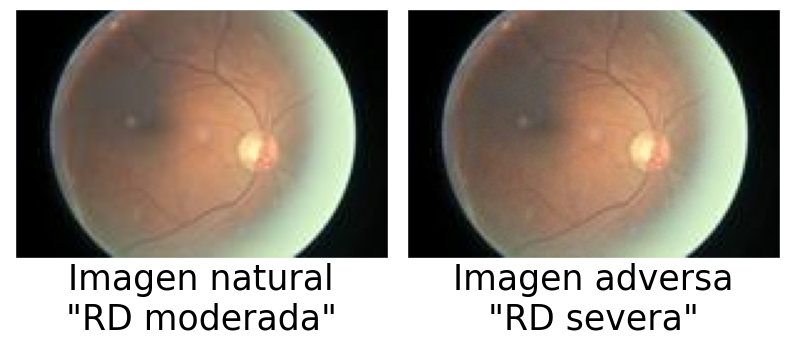

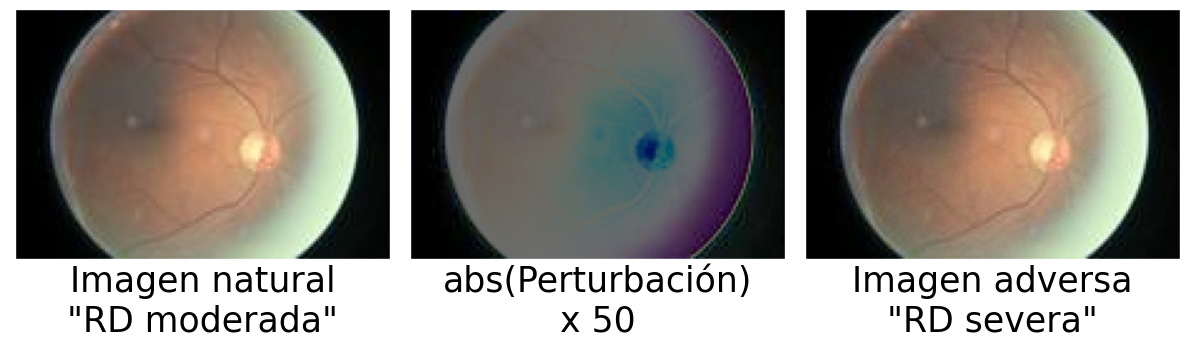

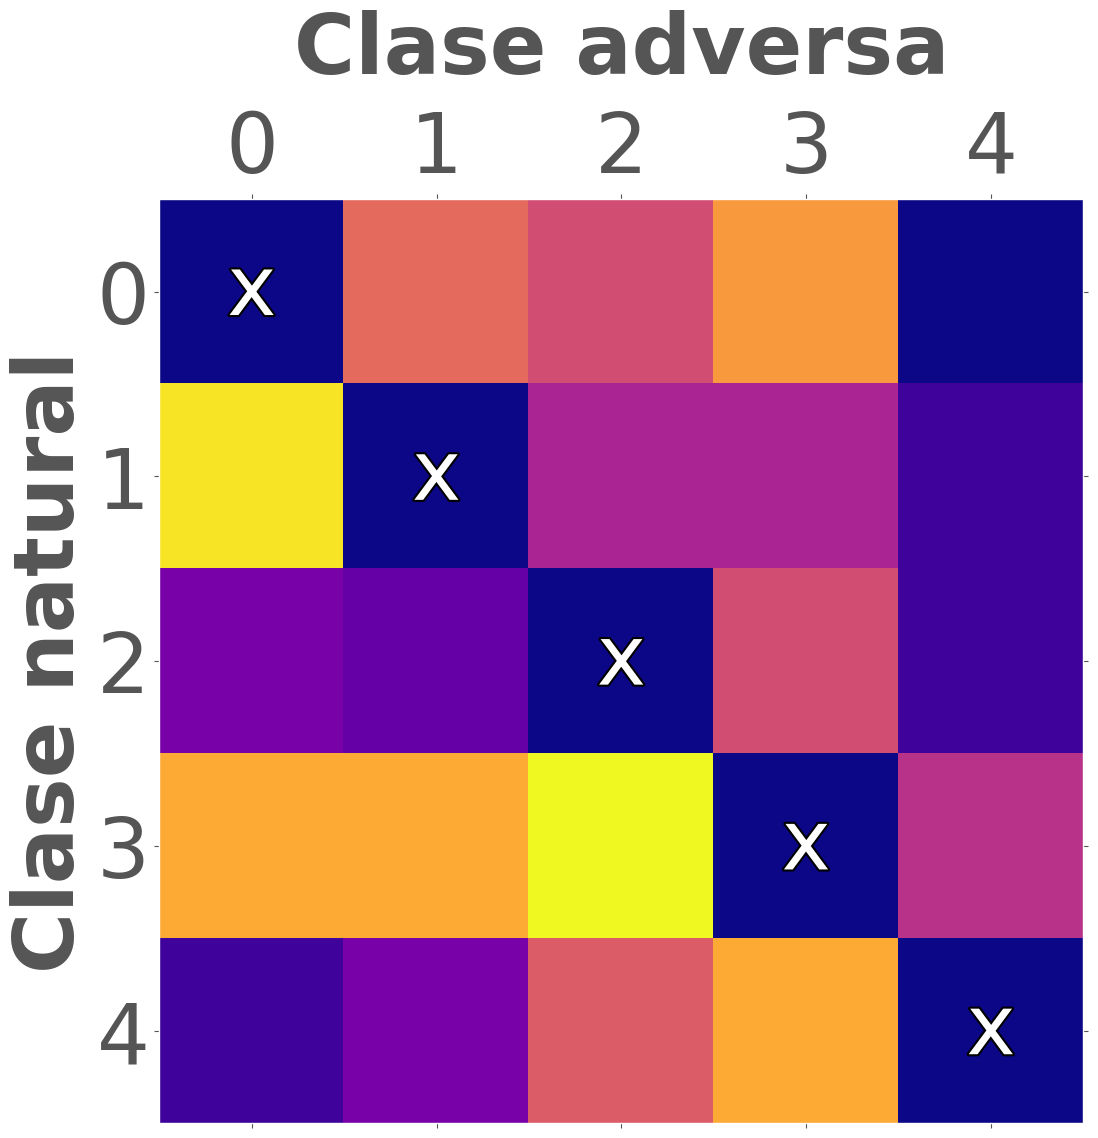

In [54]:
path_attack_data_load = path_gen_data + dataset + "-model_" + model + "-"+ attack_desc +".npz"
path_single_attack_sample_save = path_graphs + dataset + "-model_" + model + "-"+ attack_desc +"-single_attack_sample.pdf"
path_single_attack_sample_save_with_pert = path_graphs + dataset + "-model_" + model + "-"+ attack_desc +"-single_attack_sample_with_pert.pdf"
path_dist_adv_ex_mat = path_graphs + dataset + "-model_" + model + "-"+ attack_desc + "-dist_adv_ex_mat.pdf"

attack_data = np.load(path_attack_data_load)

dist_adv_ex_mat = attack_data['dist_adv_ex_mat']
rho = attack_data["rho"]
p_succ = attack_data["p_succ"]
i_succ = attack_data["i_succ"]
n_classified = attack_data["n_classified"]
X_test_nat_adv = attack_data["X_test_nat_adv"]
X_test_nat_adv_pred = attack_data["X_test_nat_adv_pred"]

if attack.startswith('deepfool'):
    attack_parameters = ["eta","max_iter"]
elif attack.startswith('FGSM'):
    attack_parameters = ["epsilon"]
elif attack.startswith('CW2'):
    attack_parameters = ["kappa","cte_init","cte_update","max_iter"]

# Sometimes (particularly in CW2 attack) some adv imgs contain nans or infs. So any img with any value inf or nan will be deleted.
infs = np.where(np.isinf(X_test_nat_adv[1]))[0]
nans = np.where(np.isnan(X_test_nat_adv[1]))[0]
imgs_idxs_to_del = np.unique(np.concatenate((infs, nans), axis=None))
if imgs_idxs_to_del.size != 0:
    n_imgs_deleted = imgs_idxs_to_del.shape[0]
    print(str(n_imgs_deleted)+" IMAGES WERE DELETED BECAUSE THEY CONTAINED INFS OR NANS \n")
    X_test_nat_adv = np.delete(X_test_nat_adv,imgs_idxs_to_del,1)
    X_test_nat_adv_pred = np.delete(X_test_nat_adv_pred,imgs_idxs_to_del,1)
    diff = (X_test_nat_adv[0] - X_test_nat_adv[1])**2
    diff = np.sum(diff, axis = 3)
    diff = np.sum(diff, axis = 2)
    diff = np.sum(diff, axis = 1)
    den = np.sum(X_test_nat_adv[0]**2,axis = 3)
    den = np.sum(den ,axis = 2)
    den = np.sum(den ,axis = 1)
    
    # Update some parameters
    i_succ -= n_imgs_deleted
    n_classified -= n_imgs_deleted
    p_succ = i_succ / n_classified
    rho = np.sum(np.sqrt(diff/den))/i_succ

l2_papers = (X_test_nat_adv[0,...] - X_test_nat_adv[1,...])**2
l2_papers = np.sum(l2_papers, axis = 3)
l2_papers = np.sum(l2_papers, axis = 2)
l2_papers = np.sum(l2_papers, axis = 1)
# den = np.sum(np.sum(np.sum(X_test_nat_adv[0,...]**2,axis=3),axis=2),axis=1)
# l2_papers /= den
l2_papers = np.sqrt(l2_papers)
l2_papers = np.mean(l2_papers)
    
img_idx = 1
nat_img = np.squeeze(X_test_nat_adv[0,img_idx,:,:,:])
adv_img = np.squeeze(X_test_nat_adv[1,img_idx,:,:,:])
nat_img_class = X_test_nat_adv_pred[0,img_idx]
adv_img_class = X_test_nat_adv_pred[1,img_idx]

print("---TRAIN PHASE---")
print("Dataset: "+dataset)
print("Model: "+model)
print("Last accuracy (val): " + str(lastValAcc))
print("")
print("\n---ATTACK PHASE---")
print("Attack: "+attack)
print("p_succ = i_succ / n_classified : "+str(p_succ)+" = " + str(i_succ) + "/" +str(n_classified))
print("rho: "+str(rho))
print("l2: "+str(l2_papers))
for p in attack_parameters:
    print(p + ": "+str(np.round(attack_data[p],3)))
print("\n")

y_title = -0.22 if (dataset != "smallDR" and dataset != "DR") else -0.32
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4.5))
ax1.imshow(nat_img, cmap = 'gray')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.set_title(dict_natural_img[lang]+'\n"'+dict_class_names[dataset][lang][nat_img_class]+'"', fontsize = 25, y=y_title)
ax2.imshow(adv_img, cmap = 'gray')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.set_title(dict_adversarial_img[lang]+'\n"'+dict_class_names[dataset][lang][adv_img_class]+'"', fontsize = 25, y=y_title)
plt.subplots_adjust(hspace=0.5) # adjust vertical_spacing = 0.5 * axes_height
fig.tight_layout()
fig.savefig(path_single_attack_sample_save, bbox_inches="tight", pad_inches=0)
plt.show()
plt.close(fig)

if dataset == "MNIST":
    pert_factor = 8
elif dataset == "CIFAR10":
    pert_factor = 100
elif dataset == "DR":
    pert_factor = 50
elif dataset == "smallDR":
    pert_factor = 50

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4.5))
ax1.imshow(nat_img, cmap = 'gray')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.set_title(dict_natural_img[lang]+'\n"'+dict_class_names[dataset][lang][nat_img_class]+'"', fontsize = 25, y=y_title)
ax2.imshow(np.abs(adv_img-nat_img)*pert_factor, cmap = 'gray')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.set_title(dict_abs_perturbation[lang]+"\nx "+str(pert_factor), fontsize = 25, y=y_title)
ax3.imshow(adv_img, cmap = 'gray')
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax3.set_title(dict_adversarial_img[lang]+'\n"'+dict_class_names[dataset][lang][adv_img_class]+'"', fontsize = 25, y=y_title)
plt.subplots_adjust(hspace=0.5) # adjust vertical_spacing = 0.5 * axes_height
fig.tight_layout()
fig.savefig(path_single_attack_sample_save_with_pert, bbox_inches="tight", pad_inches=0)
plt.show()
plt.close(fig)

nb_classes = dist_adv_ex_mat.shape[0]

fig, ax = plt.subplots(figsize = (12,12))
ax.matshow(dist_adv_ex_mat, cmap = plt.cm.plasma)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_xticks(np.arange(nb_classes))
ax.set_yticks(np.arange(nb_classes))
ax.set_xlabel(dict_adv_class[lang], fontsize = 60, fontweight='bold', labelpad = 25)
ax.set_ylabel(dict_real_class[lang], fontsize = 60, fontweight='bold')
ax.tick_params(axis='both', labelsize=60)

for i in range(nb_classes):
    for j in range(nb_classes):
        c = dist_adv_ex_mat[j,i]
        c = '' # comment this to show numbers in matrix
        if(i==j):
            c = 'x'
        ax.text(i, j, str(c), va='center', ha='center', fontsize = 60, color = "white", path_effects=[path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
        
ax.grid()
plt.show()
fig.savefig(path_dist_adv_ex_mat, bbox_inches="tight", pad_inches=0)

### Extra - save only colorbar (matrices)

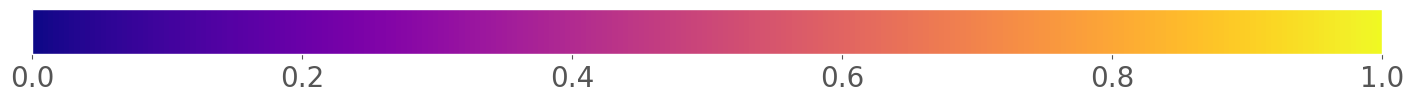

In [55]:
a = np.array([[0.0,1]])
pl.figure(figsize=(15, 1))
img = pl.imshow(a, cmap=plt.cm.plasma)
pl.gca().set_visible(False)
cax = pl.axes([0.05, 0.4, 0.9, 0.45])
cbar = pl.colorbar(orientation="horizontal", cax=cax)
cbar.ax.tick_params(labelsize=20)
pl.savefig(path_graphs + "colorbar_matrices.pdf")

## DETECTION

---TRAIN PHASE---
Dataset: smallDR
Model: 2
Last accuracy (val): 0.328


---ATTACK PHASE---
Attack: CW2
p_succ = i_succ / n_classified : 1.0000 = 200/200
rho: 0.0174
kappa: 0.1
cte_init: 0.017
cte_update: 0.017
max_iter: 50


---DETECTION PHASE (with rocauc as score)---
Detection: stoGauNet
Best ROCAUC(set): 0.6249 
which is obtained with sigmaC = 2.0000 ; sigmaD 8.0000
That point has a min_error of: 0.3688 
which is obtained with a threshold of 0.0063 
So:
ROCAUC(set): 0.6249
min_error(set): 0.3688
p_det(set): 0.6312
Next we run the validation set of pairs of nat/adv images
So we choose again sigmaC = 2.0000 ; sigmaD 8.0000 ; threshold 0.0063 and we get:
ROCAUC(val): 0.5500
min_error(val): 0.4500
p_det(val): 0.5500


ROCAUC scores, the best point will be chosen from here. That is, the combination of noises will be the one that maximizes rocauc regardless of the min_error


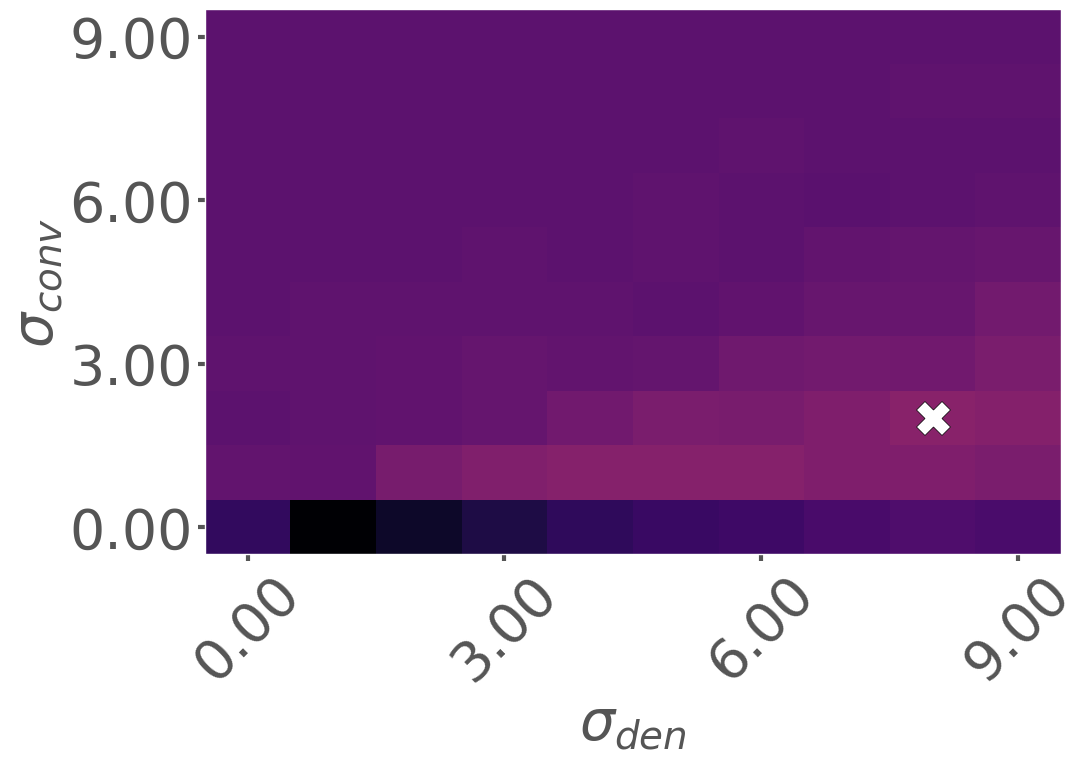

Histogram of frs (set) corresponding to the combinations of noises that result in the optimal rocauc
The best threshold is taken from this graph


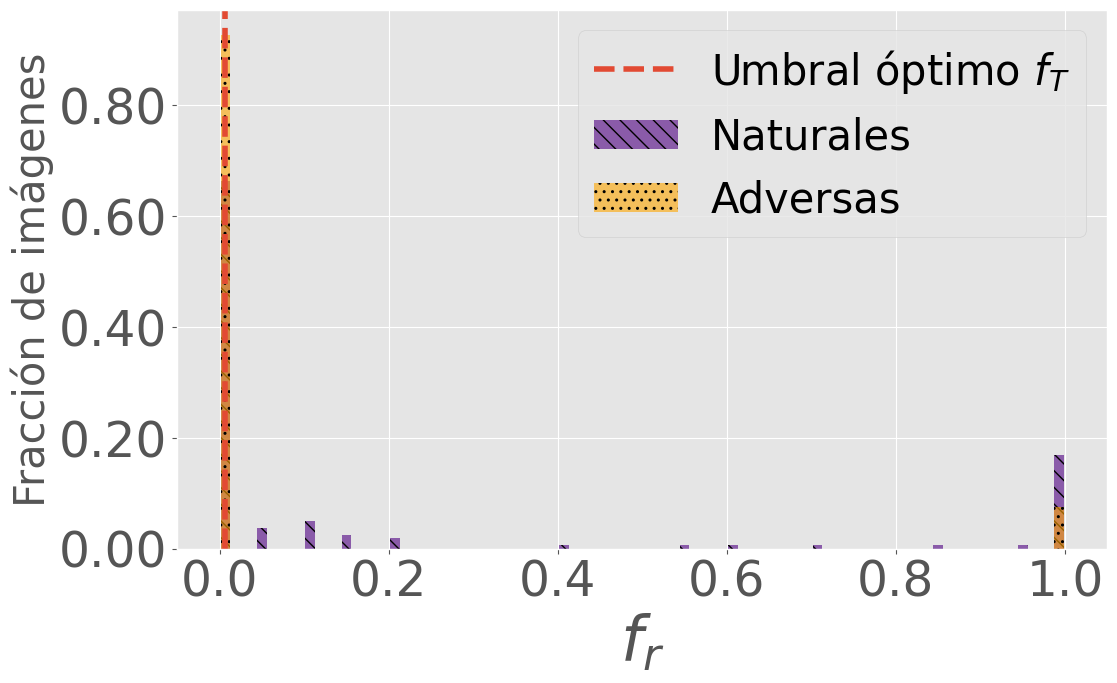

The rocauc curve shown below is obtained with the data shown above


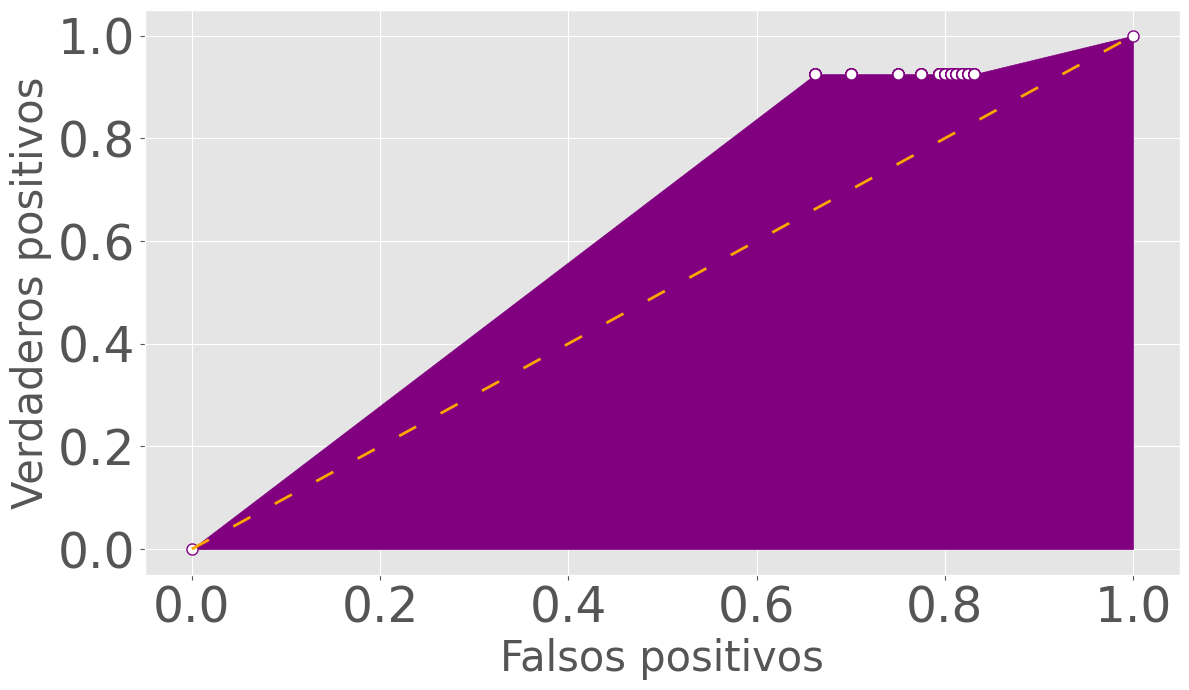


ROCAUC scores, the best point will not be chosen from here. This is just to compare with the previous colorgraph


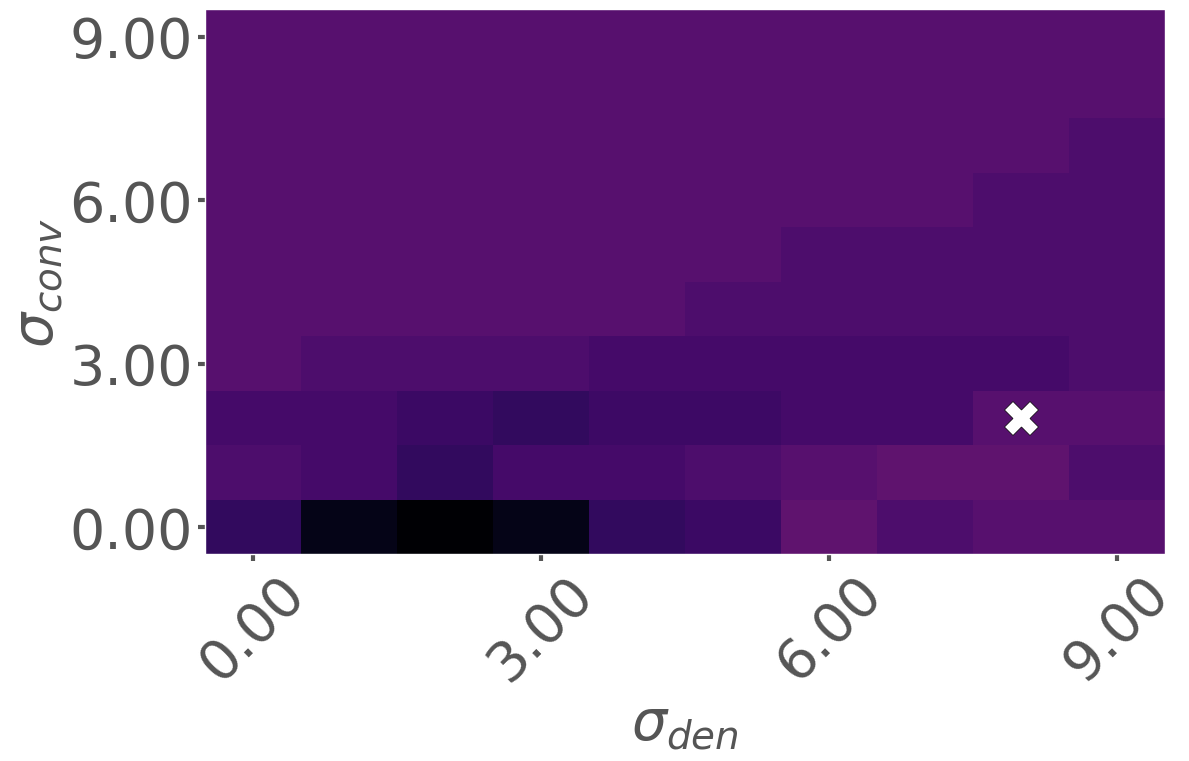

Histogram of frs (validation) corresponding to the combinations of noises that result in the optimal rocauc
The best threshold is not taken from this graph


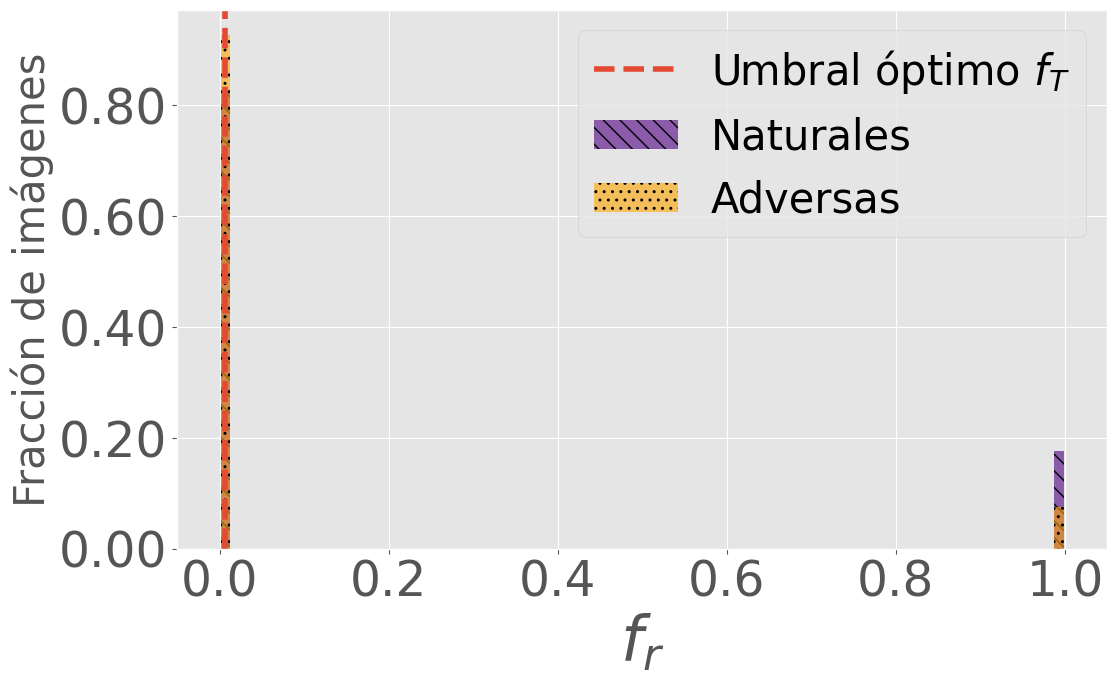

The rocauc curve shown below is obtained with the data shown above


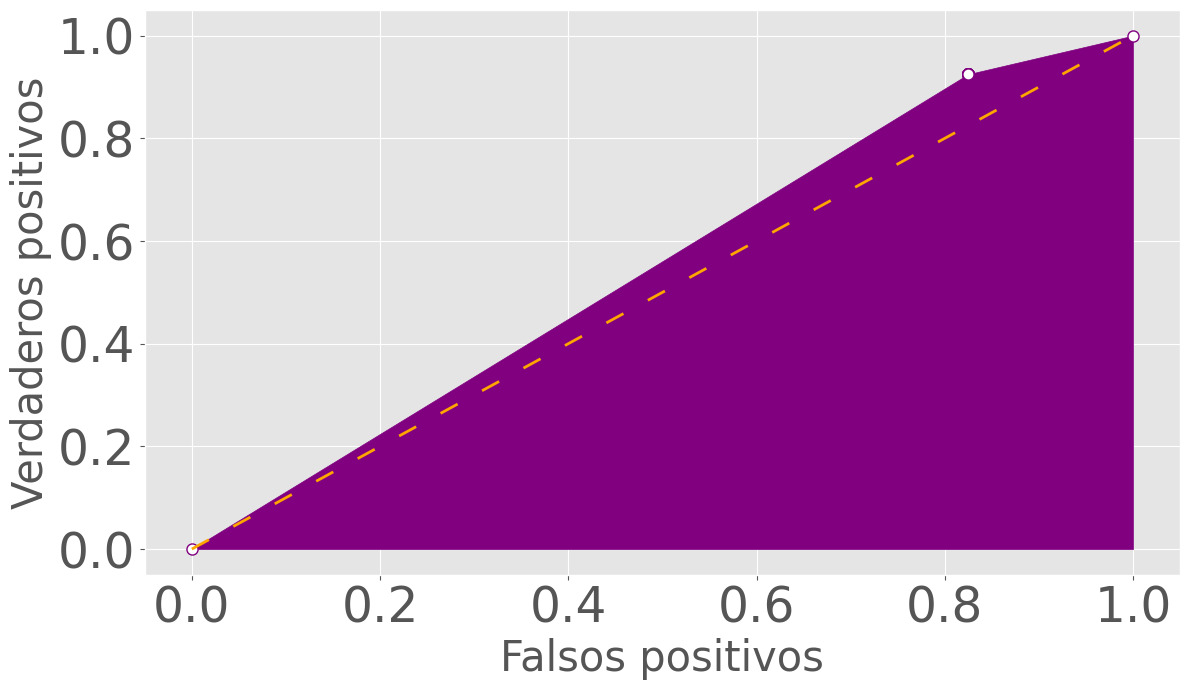

In [56]:
path_detection_data_load = path_gen_data + dataset + "-model_" + model + "-"+ attack_desc + "-" + detection_desc + ".npz"
path_colorgraph_rocauc_save = path_graphs + dataset + "-model_" + model + "-"+ attack_desc + "-" + detection_desc + "-colorgraph_rocauc"
path_colorgraph_min_error_save = path_graphs + dataset + "-model_" + model + "-"+ attack_desc + "-" + detection_desc + "-colorgraph_min_error"
path_histogram_save = path_graphs + dataset + "-model_" + model + "-"+ attack_desc + "-" + detection_desc + "-histogram"
path_rocauc_save = path_graphs + dataset + "-model_" + model + "-"+ attack_desc + "-" + detection_desc + "-rocauc"

detection_data = np.load(path_detection_data_load)
x_plot = detection_data["x_plot"]
y_plot = detection_data["y_plot"]
z_rocauc_set_plot = detection_data["z_rocauc_set_plot"]
z_rocauc_test_plot = detection_data["z_rocauc_test_plot"]
z_min_error_set_plot = detection_data["z_min_error_set_plot"]
z_min_error_test_plot = detection_data["z_min_error_test_plot"]
# frs with rocauc as score
R_frs_nat_set = detection_data["frs_nat_set_best_rocauc"]
R_frs_adv_set = detection_data["frs_adv_set_best_rocauc"]
R_frs_nat_test = detection_data["frs_nat_test_best_rocauc"]
R_frs_adv_test = detection_data["frs_adv_test_best_rocauc"]
# frs with min_error as score
M_frs_nat_set = detection_data["frs_nat_set_best_min_error"]
M_frs_adv_set = detection_data["frs_adv_set_best_min_error"]
M_frs_nat_test = detection_data["frs_nat_test_best_min_error"]
M_frs_adv_test = detection_data["frs_adv_test_best_min_error"]

# R_ means that rocauc is being used as the score
# M_ means that min_error is being used as the score

R_best_rocauc_set = functions.roc_auc(R_frs_nat_set, R_frs_adv_set)
R_best_rocauc_test = functions.roc_auc(R_frs_nat_test, R_frs_adv_test)
(R_min_error_set, R_best_threshold_set) = functions.min_error(R_frs_nat_set,R_frs_adv_set)
succ_nat = np.sum(R_frs_nat_test>R_best_threshold_set)
succ_adv = np.sum(R_frs_adv_test<R_best_threshold_set)
R_min_error_test =  1 - (succ_nat + succ_adv) / 2 / R_frs_nat_test.shape[0]

# Optimal pair of noises to get optimal ROCAUC
idxs = np.unravel_index(z_rocauc_set_plot.argmax(), z_rocauc_set_plot.shape)
if(z_rocauc_set_plot[idxs] == np.amax(z_rocauc_set_plot)):
    y_edge1 = y_plot[idxs]
    y_edge2 = y_plot[idxs[0]+1,idxs[1]]
    R_conv_noise_opt = y_edge1 + (y_edge2 - y_edge1)/2
    x_edge1 = x_plot[idxs]
    x_edge2 = x_plot[idxs[0],idxs[1]+1]
    R_dense_noise_opt = x_edge1 + (x_edge2-x_edge1)/2
else:
    print("Error")
    
M_best_rocauc_set = functions.roc_auc(M_frs_nat_set, M_frs_adv_set)
M_best_rocauc_test = functions.roc_auc(M_frs_nat_test, M_frs_adv_test)
(M_min_error_set, M_best_threshold_set) = functions.min_error(M_frs_nat_set,M_frs_adv_set)
succ_nat = np.sum(M_frs_nat_test>M_best_threshold_set)
succ_adv = np.sum(M_frs_adv_test<M_best_threshold_set)
M_min_error_test =  1 - (succ_nat + succ_adv) / 2 / M_frs_nat_test.shape[0]

# Optimal pair of noises to get optimal min_error
idxs = np.unravel_index(z_min_error_set_plot.argmin(), z_min_error_set_plot.shape)
if(z_min_error_set_plot[idxs] == np.amin(z_min_error_set_plot)):
    y_edge1 = y_plot[idxs]
    y_edge2 = y_plot[idxs[0]+1,idxs[1]]
    M_conv_noise_opt = y_edge1 + (y_edge2 - y_edge1)/2
    x_edge1 = x_plot[idxs]
    x_edge2 = x_plot[idxs[0],idxs[1]+1]
    M_dense_noise_opt = x_edge1 + (x_edge2-x_edge1)/2
else:
    print("Error")

print("---TRAIN PHASE---")
print("Dataset: "+dataset)
print("Model: "+model)
print("Last accuracy (val): " + str(lastValAcc))
print("")
print("\n---ATTACK PHASE---")
print("Attack: "+attack)
print("p_succ = i_succ / n_classified : "+"{:.4f}".format(p_succ)+" = " + str(i_succ) + "/" +str(n_classified))
print("rho: {:.4f}".format(rho))
for p in attack_parameters:
    print(p + ": "+str(np.round(attack_data[p],4)))
print("")
print("\n---DETECTION PHASE (with rocauc as score)---")
print("Detection: "+detection)
print("Best ROCAUC(set): {:.4f} ".format(R_best_rocauc_set))
print("which is obtained with sigmaC = {:.4f} ; sigmaD {:.4f}".format(R_conv_noise_opt,R_dense_noise_opt))
print("That point has a min_error of: {:.4f} ".format(R_min_error_set))
print("which is obtained with a threshold of {:.4f} ".format(R_best_threshold_set))
print("So:")
print("ROCAUC(set): {:.4f}".format(R_best_rocauc_set))
print("min_error(set): {:.4f}".format(R_min_error_set))
print("p_det(set): {:.4f}".format(1-R_min_error_set))
print("Next we run the validation set of pairs of nat/adv images")
print("So we choose again sigmaC = {:.4f} ; sigmaD {:.4f} ; threshold {:.4f} and we get:".format(R_conv_noise_opt,R_dense_noise_opt, R_best_threshold_set))
print("ROCAUC(val): {:.4f}".format(R_best_rocauc_test))
print("min_error(val): {:.4f}".format(R_min_error_test))
print("p_det(val): {:.4f}".format(1-R_min_error_test))
print("")


# COLORGRAPH ROCAUC (SET)
print("\nROCAUC scores, the best point will be chosen from here. That is, the combination of noises will be the one that maximizes rocauc regardless of the min_error")

#colorgraph resolution
dx_plot, dy_plot = x_plot[0,1] - x_plot[0,0], y_plot[1,0] - y_plot[0,0]

#values to show in the graph
my_xticks = x_plot[0,:]
my_xticks = my_xticks[0:-1] + dx_plot/2
my_xticks = np.linspace(x_plot[0,0] + dx_plot/2, x_plot[0,-1] - dx_plot/2, 4, endpoint = True) # reduce num of x ticks
my_yticks = y_plot[:,0]
my_yticks = my_yticks[0:-1] + dy_plot/2
my_yticks = np.linspace(y_plot[0,0] + dy_plot/2, y_plot[-1,0] - dy_plot/2, 4, endpoint = True) # reduce num of x ticks

levels = MaxNLocator(nbins=100).tick_values(z_rocauc_set_plot.min(), z_rocauc_set_plot.max())
cmap = plt.get_cmap('inferno')

fig, ax0 = plt.subplots(1, figsize=(11,7))
im = ax0.pcolormesh(x_plot, y_plot, z_rocauc_set_plot, cmap=cmap, vmin = 0.4, vmax = 1.0)
#cbar = fig.colorbar(im)
#for l in cbar.ax.yaxis.get_ticklabels():
#    l.set_fontsize(20)
ax0.set_xlabel(dict_sigma_dense[lang], fontsize=40)
ax0.set_ylabel(dict_sigma_conv[lang], fontsize=40)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax0.set_xticks(my_xticks)
ax0.set_yticks(my_yticks)
ax0.tick_params(axis='both', labelsize=40, length = 5, width = 3) # modified for springer
ax0.ticklabel_format(style="plain")
ax0.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax0.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax0.scatter(R_dense_noise_opt,R_conv_noise_opt,s=600,color = 'white',marker = 'X' , edgecolors = 'black')
fig.tight_layout()
plt.xticks(rotation=45)
fig.savefig(path_colorgraph_rocauc_save+"_set.pdf", bbox_inches="tight", pad_inches=0)
plt.show()
plt.close(fig)

# Plot histogram
print("Histogram of frs (set) corresponding to the combinations of noises that result in the optimal rocauc")
print("The best threshold is taken from this graph")

# Generate variables to plot with np.bar
nb_bins = 70
x_min, x_max = -0.05, 1.05
nat_hist, nat_bins = np.histogram(R_frs_nat_set, nb_bins, range=(0,1))
adv_hist, adv_bins = np.histogram(R_frs_adv_set, nat_bins, range=(0,1))
bin_width = (nat_bins[1] - nat_bins[0])
bar_width = 0.8 * bin_width

color_nat = (0.3,0,0.51,1.0)
color_adv = (1,0.65,0,1.0)
hatch_nat = 2*'\\'
hatch_adv = 2*'.'
imgs_sum = nat_hist.sum()
fig, ax = plt.subplots(1,figsize=(12,7))
ax.set_xlim([x_min,x_max])
#ax.get_yaxis().set_ticks([])
ax.bar(nat_bins[:-1]+bin_width/2, nat_hist/imgs_sum, width=bar_width, align='center', color=color_nat, fc=color_nat, label=dict_naturals[lang], hatch=hatch_nat, alpha = 0.6 )
ax.bar(adv_bins[:-1]+bin_width/2, adv_hist/imgs_sum, width=bar_width, align='center', color=color_adv, fc=color_adv, label=dict_adversarials[lang], hatch=hatch_adv, alpha = 0.6)
ax.axvline(x = R_best_threshold_set, label = dict_best_threshold[lang], linestyle = '--', linewidth = 4)
ax.set_xlabel('$f_{r}$',fontsize = 45)
ax.set_ylabel(dict_images_fraction[lang], fontsize = 30)
ax.legend(loc='best', fontsize = 30)
ax.tick_params(axis='both', labelsize = 35)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.savefig(path_histogram_save+"_set_R.pdf", bbox_inches="tight", pad_inches=0)
plt.show()
plt.close(fig)

#ROCAUC curve
print("The rocauc curve shown below is obtained with the data shown above")
nb = R_frs_nat_set.shape[0]                   # number of images
lin = np.linspace(0,1,endpoint=True,num=nb) # used only for plotting

#Cumulative histograms
res = stats.cumfreq(R_frs_nat_set, numbins=nb, defaultreallimits=(0, 1))
res_adver = stats.cumfreq(R_frs_adv_set, numbins=nb, defaultreallimits=(0, 1))

# True and false positives
tpos=res_adver[0]/nb
fpos=res[0]/nb

first_element = np.array([0])
tpos = np.append(first_element,tpos)
fpos = np.append(first_element,fpos)

# Plot
fig, ax = plt.subplots(1, figsize=(12,7))
ax.fill_between(fpos, tpos, color="purple")
ax.plot(fpos, tpos, linestyle='none', linewidth=2, marker='o', markersize=8, markerfacecolor="white", markeredgecolor="purple")
ax.plot(lin, lin, color="orange", linestyle=(0, (7, 10)), linewidth=2)
ax.set_xticks(np.arange(0, 1.2, step=0.2))
ax.set_yticks(np.arange(0, 1.2, step=0.2))
ax.tick_params(axis='both', labelsize=35)
ax.set_xlabel(dict_fp[lang],fontsize = 30)
ax.set_ylabel(dict_tp[lang], fontsize = 30)
fig.tight_layout()
fig.savefig(path_rocauc_save+"_set_R.pdf", bbox_inches="tight", pad_inches=0)
plt.show()
plt.close(fig)

# COLORGRAPH ROCAUC (TEST/VALIDATION)
print("\nROCAUC scores, the best point will not be chosen from here. This is just to compare with the previous colorgraph")

levels = MaxNLocator(nbins=100).tick_values(z_rocauc_test_plot.min(), z_rocauc_test_plot.max())

fig, ax0 = plt.subplots(1, figsize=(12,7))
im = ax0.pcolormesh(x_plot, y_plot, z_rocauc_test_plot, cmap=cmap, vmin = 0.4, vmax = 1.0)
#cbar = fig.colorbar(im)
#for l in cbar.ax.yaxis.get_ticklabels():
#    l.set_fontsize(20)
ax0.set_xlabel(dict_sigma_dense[lang], fontsize=40)
ax0.set_ylabel(dict_sigma_conv[lang], fontsize=40)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax0.set_xticks(my_xticks)
ax0.set_yticks(my_yticks)
ax0.tick_params(axis='both', labelsize=40, length = 5, width = 3) # modified for springer
ax0.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax0.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax0.scatter(R_dense_noise_opt,R_conv_noise_opt,s=600,color = 'white',marker = 'X' , edgecolors = 'black')
fig.tight_layout()
plt.xticks(rotation=45)
fig.savefig(path_colorgraph_rocauc_save+"_test.pdf", bbox_inches="tight", pad_inches=0)
plt.show()
plt.close(fig)

# Plot histogram
print("Histogram of frs (validation) corresponding to the combinations of noises that result in the optimal rocauc")
print("The best threshold is not taken from this graph")

# Generate variables to plot with np.bar
nb_bins = 70
x_min, x_max = -0.05, 1.05
nat_hist, nat_bins = np.histogram(R_frs_nat_test, nb_bins, range=(0,1))
adv_hist, adv_bins = np.histogram(R_frs_adv_test, nat_bins, range=(0,1))
bin_width = (nat_bins[1] - nat_bins[0])
bar_width = 0.8 * bin_width

color_nat = (0.3,0,0.51,1.0)
color_adv = (1,0.65,0,1.0)
hatch_nat = 2*'\\'
hatch_adv = 2*'.'
imgs_sum = nat_hist.sum()
fig, ax = plt.subplots(1,figsize=(12,7))
ax.set_xlim([x_min,x_max])
#ax.get_yaxis().set_ticks([])
ax.bar(nat_bins[:-1]+bin_width/2, nat_hist/imgs_sum, width=bar_width, align='center', color=color_nat, fc=color_nat, label=dict_naturals[lang], hatch=hatch_nat, alpha = 0.6)
ax.bar(adv_bins[:-1]+bin_width/2, adv_hist/imgs_sum, width=bar_width, align='center', color=color_adv, fc=color_adv, label=dict_adversarials[lang], hatch=hatch_adv, alpha = 0.6)
ax.axvline(x = R_best_threshold_set, label = dict_best_threshold[lang], linestyle = '--', linewidth = 4)
ax.set_xlabel('$f_{r}$',fontsize = 45)
ax.set_ylabel(dict_images_fraction[lang], fontsize = 30)
ax.legend(loc='best', fontsize = 30)
ax.tick_params(axis='both', labelsize = 35)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.savefig(path_histogram_save+"_test_R.pdf", bbox_inches="tight", pad_inches=0)
plt.show()
plt.close(fig)

#ROCAUC curve
print("The rocauc curve shown below is obtained with the data shown above")
nb = R_frs_nat_test.shape[0]                   # number of images
lin = np.linspace(0,1,endpoint=True,num=nb) # used only for plotting

#Cumulative histograms
res = stats.cumfreq(R_frs_nat_test, numbins=nb, defaultreallimits=(0, 1))
res_adver = stats.cumfreq(R_frs_adv_test, numbins=nb, defaultreallimits=(0, 1))

# True and false positives
tpos=res_adver[0]/nb
fpos=res[0]/nb

first_element = np.array([0])
tpos = np.append(first_element,tpos)
fpos = np.append(first_element,fpos)

# Plot
fig, ax = plt.subplots(1, figsize=(12,7))
ax.fill_between(fpos, tpos, color="purple")
ax.plot(fpos, tpos, linestyle='none', linewidth=2, marker='o', markersize=8, markerfacecolor="white", markeredgecolor="purple")
ax.plot(lin, lin, color="orange", linestyle=(0, (7, 10)), linewidth=2)
ax.set_xticks(np.arange(0, 1.2, step=0.2))
ax.set_yticks(np.arange(0, 1.2, step=0.2))
ax.tick_params(axis='both', labelsize=35)
ax.set_xlabel(dict_fp[lang],fontsize = 30)
ax.set_ylabel(dict_tp[lang], fontsize = 30)
fig.tight_layout()
fig.savefig(path_rocauc_save+"_test_R.pdf", bbox_inches="tight", pad_inches=0)
plt.show()
plt.close(fig)

### Extra - save only colorbar (colorgraphs)

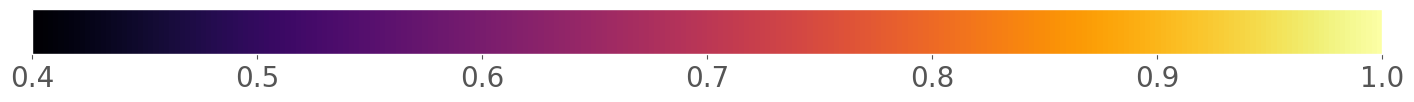

In [49]:
import pylab as pl

a = np.array([[0.4,1]])
pl.figure(figsize=(15, 1))
img = pl.imshow(a, cmap="inferno")
pl.gca().set_visible(False)
cax = pl.axes([0.05, 0.4, 0.9, 0.45])
cbar = pl.colorbar(orientation="horizontal", cax=cax)
cbar.ax.tick_params(labelsize=20)
pl.savefig(path_graphs + "colorbar_colorgraph.pdf")

# ONE MODEL, MULTIPLE ATTACKS

In [20]:
dataset = "MNIST"
model = "1"
deepfool_version = "eta_0_01_mi_20_ns_2000"
fgsm_version = "eps_0_062_ns_2000"
cw2_version = "kap_0_1_cte_0_011_cteupd_0_011_mi_20_ns_2000"

# MNIST
idx_deepfool = 18
idx_fgsm = 1
idx_cw2 = 12

# CIFAR10
# idx_deepfool = 1
# idx_fgsm = 1
# idx_cw2 = 1

# DR
# idx_deepfool = 2
# idx_fgsm = 1
# idx_cw2 = 1

# smallDR
# idx_deepfool = 2
# idx_fgsm = 0
# idx_cw2 = 1

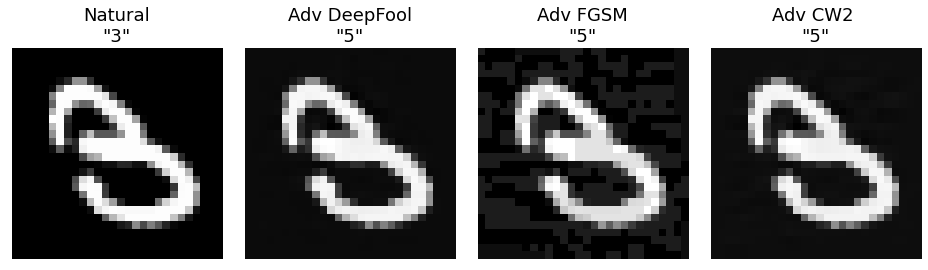

In [138]:
path_deepfool_data_load = path_gen_data + dataset + "-model_" + model + "-deepfool_" + deepfool_version + ".npz"
path_fgsm_data_load = path_gen_data + dataset + "-model_" + model + "-FGSM_" + fgsm_version + ".npz"
path_cw2_data_load = path_gen_data + dataset + "-model_" + model + "-CW2_" + cw2_version + ".npz"

path_multiple_attack_sample_save = path_graphs + dataset + "-model_" + model + "-multiple_attack_sample.pdf"

data_deepfool = np.load(path_deepfool_data_load)
data_fgsm = np.load(path_fgsm_data_load)
data_cw2 = np.load(path_cw2_data_load)

deepfool_X_test_nat_adv = data_deepfool["X_test_nat_adv"]
deepfool_X_test_nat_adv_pred = data_deepfool["X_test_nat_adv_pred"]
fgsm_X_test_nat_adv = data_fgsm["X_test_nat_adv"]
fgsm_X_test_nat_adv_pred = data_fgsm["X_test_nat_adv_pred"]
cw2_X_test_nat_adv = data_cw2["X_test_nat_adv"]
cw2_X_test_nat_adv_pred = data_cw2["X_test_nat_adv_pred"]

nat_img = np.squeeze(deepfool_X_test_nat_adv[0, idx_deepfool, :, :, :])
adv_img_deepfool = np.squeeze(deepfool_X_test_nat_adv[1, idx_deepfool, :, :, :])
adv_img_fgsm = np.squeeze(fgsm_X_test_nat_adv[1, idx_fgsm, :, :, :])
adv_img_cw2 = np.squeeze(cw2_X_test_nat_adv[1, idx_cw2, :, :, :])

nat_img_class = deepfool_X_test_nat_adv_pred[0, idx_deepfool]
adv_img_deepfool_class = deepfool_X_test_nat_adv_pred[1, idx_deepfool]
adv_img_fgsm_class = fgsm_X_test_nat_adv_pred[1, idx_fgsm]
adv_img_cw2_class = cw2_X_test_nat_adv_pred[1, idx_cw2]

nat_img_class = dict_class_names[dataset][lang][nat_img_class]
adv_img_deepfool_class = dict_class_names[dataset][lang][adv_img_deepfool_class]
adv_img_fgsm_class = dict_class_names[dataset][lang][adv_img_fgsm_class]
adv_img_cw2_class = dict_class_names[dataset][lang][adv_img_cw2_class]

figsize = (13, 4)
fontsize = 18
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=figsize)

ax1.imshow(nat_img, cmap = 'gray')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.set_title('Natural\n"' + nat_img_class + '"', fontsize = fontsize)

ax2.imshow(adv_img_deepfool, cmap = 'gray')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.set_title('Adv DeepFool\n"' + adv_img_deepfool_class + '"', fontsize = fontsize)

ax3.imshow(adv_img_fgsm, cmap = 'gray')
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax3.set_title('Adv FGSM\n"' + adv_img_fgsm_class + '"', fontsize = fontsize)

ax4.imshow(adv_img_cw2, cmap = 'gray')
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax4.set_title('Adv CW2 \n"' + adv_img_cw2_class + '"', fontsize = fontsize)


fig.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0.1)
fig.savefig(path_multiple_attack_sample_save, bbox_inches="tight", pad_inches=0)
plt.show()
plt.close(fig)